#EXERCISE - 7

In [1]:
import pandas as pd
import numpy as np
import re
import string
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns
import IPython

In [2]:
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [3]:
!pip install scattertext 
import spacy
import scattertext as st

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.3 MB 11.6 MB/s 
     |████████████████████████████████| 24.1 MB 2.7 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=713fa6b59d9e937898ad6e282b76ba00fa21cf965e76837ef72893c0d4a468c3
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, RNN, Bidirectional,GlobalMaxPool1D,BatchNormalization

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_data = pd.read_csv("/content/drive/MyDrive/Deep Learning Lab Sem - V/Lab - 7/IMDB_Train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Deep Learning Lab Sem - V/Lab - 7/IMDB_Test.csv")
valid_data = pd.read_csv("/content/drive/MyDrive/Deep Learning Lab Sem - V/Lab - 7/Valid.csv")

In [7]:
display(train_data.head())
print("\nShape: ",train_data.shape)

text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1


Shape:  (40000, 2)


In [8]:
display(test_data.head())
print("Shape: ",test_data.shape)

text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0

Shape:  (5000, 2)


In [9]:
display(valid_data.head())
print("Shape: ",valid_data.shape)

text  label
0  It's been about 14 years since Sharon Stone aw...      0
1  someone needed to make a car payment... this i...      0
2  The Guidelines state that a comment must conta...      0
3  This movie is a muddled mish-mash of clichés f...      0
4  Before Stan Laurel became the smaller half of ...      0

Shape:  (5000, 2)


In [10]:
print("Train Data: \n",train_data['label'].value_counts())

Train Data: 
 0    20019
1    19981
Name: label, dtype: int64


In [11]:
print("Test Data: \n",test_data['label'].value_counts())

Test Data: 
 1    2505
0    2495
Name: label, dtype: int64


In [12]:
print("Validation Data: \n",valid_data['label'].value_counts())

Validation Data: 
 1    2514
0    2486
Name: label, dtype: int64


In [13]:
stop_words = set(stopwords.words("english")) 

def clean_text(text):
    
    text = re.sub('<[^>]*>','',text)

    text = re.sub(r'https\S','',text)

    text = re.sub(r'[^\w\s]','',text, re.UNICODE)

    text = text.lower()

    text = [word for word in text.split(" ") if not word in stop_words]
    
    text = " ".join(text)
    return text

In [14]:
train_data['Processed_Reviews'] = train_data['text'].apply(lambda x: clean_text(x))

In [15]:
test_data['Processed_Reviews'] = test_data['text'].apply(lambda x: clean_text(x))

In [16]:
valid_data['Processed_Reviews'] = valid_data['text'].apply(lambda x: clean_text(x))

In [17]:
train_data.head()

text  label  \
0  I grew up (b. 1965) watching and loving the Th...      0   
1  When I put this movie in my DVD player, and sa...      0   
2  Why do people who do not know what a particula...      0   
3  Even though I have great interest in Biblical ...      0   
4  Im a die hard Dads Army fan and nothing will e...      1   

                                   Processed_Reviews  
0  grew b 1965 watching loving thunderbirds mates...  
1  put movie dvd player sat coke chips expectatio...  
2  people know particular time past like feel nee...  
3  even though great interest biblical movies bor...  
4  im die hard dads army fan nothing ever change ...

In [18]:
lemmatizer = WordNetLemmatizer()

def tokenize_lemmatize(text):

    text = word_tokenize(text)

    text = [lemmatizer.lemmatize(token) for token in text]

    text = " ".join(text)
    return text

In [19]:
train_data['Processed_Reviews'] = train_data['Processed_Reviews'].apply(lambda x: tokenize_lemmatize(x))

In [20]:
test_data['Processed_Reviews'] = test_data['Processed_Reviews'].apply(lambda x: tokenize_lemmatize(x))

In [21]:
valid_data['Processed_Reviews'] = valid_data['Processed_Reviews'].apply(lambda x: tokenize_lemmatize(x))

In [22]:
train_data.head()

text  label  \
0  I grew up (b. 1965) watching and loving the Th...      0   
1  When I put this movie in my DVD player, and sa...      0   
2  Why do people who do not know what a particula...      0   
3  Even though I have great interest in Biblical ...      0   
4  Im a die hard Dads Army fan and nothing will e...      1   

                                   Processed_Reviews  
0  grew b 1965 watching loving thunderbird mate s...  
1  put movie dvd player sat coke chip expectation...  
2  people know particular time past like feel nee...  
3  even though great interest biblical movie bore...  
4  im die hard dad army fan nothing ever change g...

In [23]:
def get_top_n_frequent_words(x, n=None):
    vec = CountVectorizer(stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [24]:
freq_words = get_top_n_frequent_words(train_data['Processed_Reviews'])
freq_words_df = pd.DataFrame(freq_words, columns = ['Unigram Text' , 'Count'])
freq_words_df.head(10)

Unigram Text  Count
0        movie  80221
1         film  72680
2         like  32396
3         time  24062
4         good  23354
5    character  22266
6        story  19624
7         make  19153
8       really  18460
9        scene  16694

[9808, 9272, 3987, 2981, 2870, 2820, 2464, 2277, 2267, 2132]

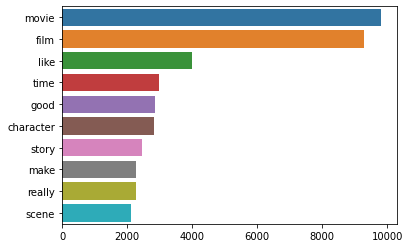

In [25]:
# Visualising the most frequent unigrams in the tweets i.e., top 10:

top_unigrams = get_top_n_frequent_words(test_data['Processed_Reviews'],10)
x,y = map(list,zip(*top_unigrams))
sns.barplot(x = y,y = x)
display(y)

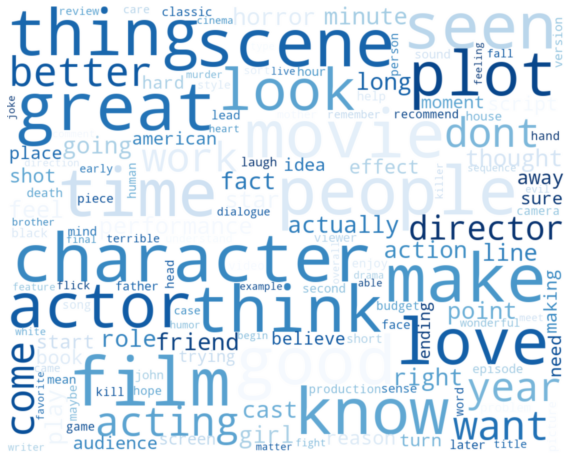

In [26]:
# Visualizing for unigram text:

word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'Blues', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(freq_words_df['Unigram Text']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

In [27]:
def get_top_n_bigram(x, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [28]:
bigram_words = get_top_n_bigram(train_data['Processed_Reviews'])
bigram_words_df = pd.DataFrame(bigram_words,columns=['Bigram words','count'])
bigram_words_df.head(10)

Bigram words  count
0       look like   2428
1        ive seen   2062
2  special effect   1767
3      movie like   1607
4  main character   1522
5        year old   1446
6      good movie   1278
7    horror movie   1230
8       dont know   1195
9      waste time   1182

[264, 249, 219, 198, 196, 190, 165, 159, 155, 153]

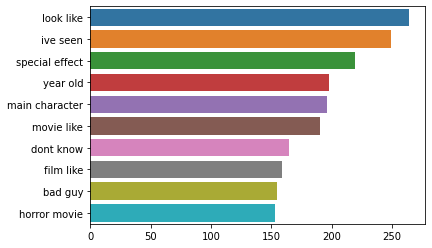

In [29]:
# Visualising the most frequent Bigrams in the tweets i.e., top 10:

top_unigrams = get_top_n_bigram(test_data['Processed_Reviews'],10)
x,y = map(list,zip(*top_unigrams))
sns.barplot(x = y,y = x)
display(y)

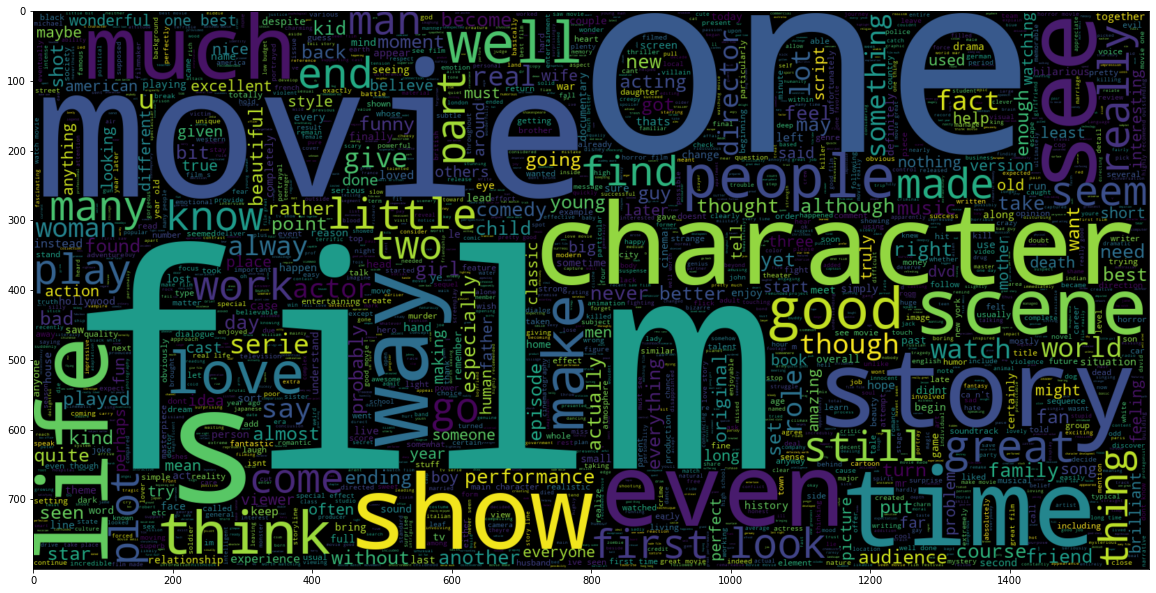

In [30]:
from wordcloud import WordCloud

# Visualizing for entire text:

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(train_data[train_data.label == 1].Processed_Reviews))
plt.imshow(wc , interpolation = 'bilinear')

In [31]:
nlp = spacy.load('en_core_web_sm')
train_data['parsed'] = train_data.Processed_Reviews[:1000].apply(nlp)

corpus_data = train_data.copy()
corpus_data["label"] = corpus_data["label"].astype(str)
corpus_viz = st.CorpusFromParsedDocuments(corpus_data.iloc[:1000,:],
                             category_col='label',
                             parsed_col='parsed').build()

In [32]:
html = st.produce_scattertext_explorer(corpus_viz,
          category='1',
          category_name='1',
          not_category_name='0',
          width_in_pixels=700,
          minimum_term_frequency=15,
          term_significance = st.LogOddsRatioUninformativeDirichletPrior(),)

In [33]:
file_name = 'terms_pair1.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IPython.display.HTML(filename=file_name)

In [34]:
from textblob import TextBlob

train_data['polarity'] = train_data['Processed_Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
train_data['review_len'] = train_data['Processed_Reviews'].apply(lambda x:len(x))
train_data['word_count'] = train_data['Processed_Reviews'].apply(lambda x: len(x.split()))

In [35]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

train_data['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    yTitle='count',
    title='Sentiment Polarity Distribution')

Tokenizing and padding the Text

In [36]:
# Maximum features in a reviews:

max_feat = 6000
embed_size=128

tokenizer = Tokenizer(num_words=max_feat)
tokenizer.fit_on_texts(train_data["Processed_Reviews"])
list_tokenized_train = tokenizer.texts_to_sequences(train_data["Processed_Reviews"])
list_tokenized_valid = tokenizer.texts_to_sequences(valid_data["Processed_Reviews"])
list_tokenized_test = tokenizer.texts_to_sequences(test_data["Processed_Reviews"])

x_valid = pad_sequences(list_tokenized_valid, maxlen=130)
y_valid = valid_data['label']

#Spelling Correction !!

x_test = pad_sequences(list_tokenized_test, maxlen=130)
y_test = test_data['label']

x_train = pad_sequences(list_tokenized_train, maxlen=130)
y_train = train_data['label']

# Function to pass Validation Data:

def valid_gen():
  return x_valid, y_valid

> **Model - LSTM:**

In [37]:
model = keras.Sequential()
model.add(Embedding(max_feat,embed_size))
for i in range(1,16):
  model.add(LSTM(20, return_sequences=True))
  model.add(Dropout(0.6))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

batch_size = 200
epochs = 10
hist_lstm = model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_data=valid_gen())


Epoch 1/10
200/200 [==============================] - 42s 103ms/step - loss: 0.6932 - accuracy: 0.5026 - val_loss: 0.6931 - val_accuracy: 0.5028
Epoch 2/10
200/200 [==============================] - 16s 78ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.4972
Epoch 3/10
200/200 [==============================] - 16s 78ms/step - loss: 0.6478 - accuracy: 0.5973 - val_loss: 0.6079 - val_accuracy: 0.7536
Epoch 4/10
200/200 [==============================] - 16s 82ms/step - loss: 0.4926 - accuracy: 0.7750 - val_loss: 0.5316 - val_accuracy: 0.7978
Epoch 5/10
200/200 [==============================] - 15s 77ms/step - loss: 0.4296 - accuracy: 0.8140 - val_loss: 0.5041 - val_accuracy: 0.8040
Epoch 6/10
200/200 [==============================] - 15s 77ms/step - loss: 0.3996 - accuracy: 0.8333 - val_loss: 0.4891 - val_accuracy: 0.8176
Epoch 7/10
200/200 [==============================] - 15s 77ms/step - loss: 0.3793 - accuracy: 0.8416 - val_loss: 0.4679 - val_accuracy

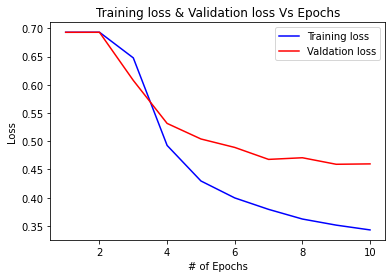

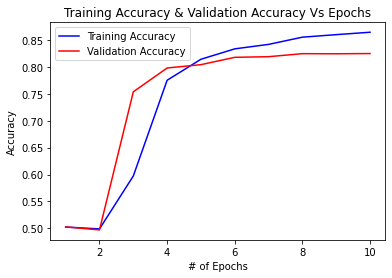

In [38]:
loss = hist_lstm.history['loss']
acc = hist_lstm.history['accuracy']
val_loss = hist_lstm.history['val_loss']
val_acc = hist_lstm.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Valdation loss')
plt.title("Training loss & Validation loss Vs Epochs")
plt.ylabel('Loss')
plt.xlabel('# of Epochs')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title("Training Accuracy & Validation Accuracy Vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('# of Epochs')
plt.legend()
plt.show()

In [39]:
model.evaluate(x_test,y_test)

157/157 [==============================] - 10s 32ms/step - loss: 0.4533 - accuracy: 0.8278


[0.45334360003471375, 0.8277999758720398]

> **Bidrectional RNN Model with LSTM:**

In [40]:
# Maximum features in a reviews:

max_feat = 6000
embed_size=128

model2 = keras.Sequential()
model2.add(Embedding(max_feat,embed_size))
for i in range(1,21):
  model2.add(Bidirectional(LSTM(20, return_sequences=True)))
  model2.add(Dropout(0.6))
model2.add(GlobalMaxPool1D())
model2.add(Dropout(0.5))
model2.add(Dense(1, activation="sigmoid"))
model2.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

batch_size = 200
epochs = 10
hist_bidrnn = model2.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_data=valid_gen())


Epoch 1/10
200/200 [==============================] - 97s 268ms/step - loss: 0.6181 - accuracy: 0.6095 - val_loss: 0.5132 - val_accuracy: 0.8374
Epoch 2/10
200/200 [==============================] - 39s 193ms/step - loss: 0.3456 - accuracy: 0.8636 - val_loss: 0.4399 - val_accuracy: 0.8636
Epoch 3/10
200/200 [==============================] - 49s 247ms/step - loss: 0.2877 - accuracy: 0.8928 - val_loss: 0.4148 - val_accuracy: 0.8712
Epoch 4/10
200/200 [==============================] - 43s 217ms/step - loss: 0.2617 - accuracy: 0.9042 - val_loss: 0.3835 - val_accuracy: 0.8762
Epoch 5/10
200/200 [==============================] - 38s 192ms/step - loss: 0.2442 - accuracy: 0.9118 - val_loss: 0.3763 - val_accuracy: 0.8736
Epoch 6/10
200/200 [==============================] - 38s 192ms/step - loss: 0.2328 - accuracy: 0.9172 - val_loss: 0.3656 - val_accuracy: 0.8756
Epoch 7/10
200/200 [==============================] - 41s 207ms/step - loss: 0.2229 - accuracy: 0.9201 - val_loss: 0.3715 - val_ac

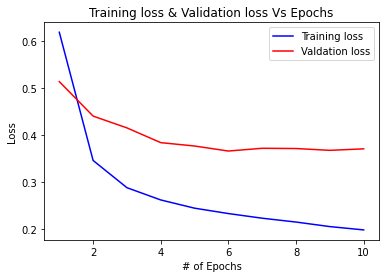

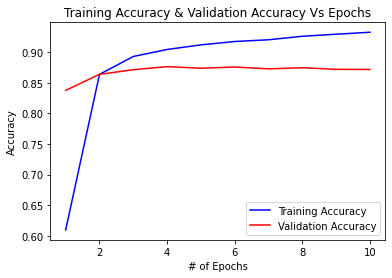

In [41]:
loss = hist_bidrnn.history['loss']
acc = hist_bidrnn.history['accuracy']
val_loss = hist_bidrnn.history['val_loss']
val_acc = hist_bidrnn.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Valdation loss')
plt.title("Training loss & Validation loss Vs Epochs")
plt.ylabel('Loss')
plt.xlabel('# of Epochs')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title("Training Accuracy & Validation Accuracy Vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('# of Epochs')
plt.legend()
plt.show()

In [42]:
model2.evaluate(x_test,y_test)

157/157 [==============================] - 24s 78ms/step - loss: 0.3677 - accuracy: 0.8748


[0.36769232153892517, 0.8748000264167786]

In [44]:
test_reviews = {
  "Infrequently, a fondue will have a variety of cheeses, including some great and some not so fine cheeses, but I always relish fondue.":1,
  "It was pretty jejune, such a waste of time":0,
  "Don't let the title fool you; this movie is only about sorrow, unfairness, despair, and suicidal depression if you so choose.":0,
  "I just watched the first twenty minutes or so, but it was enough to persuade me that it was the unhappening movie ever.":0,
  "I doted the movie far more than i should have, nut that doesn't denote it is impeccable":1,
  "Even a fantastic film about a story with a terrible conclusion is still just a fantastic film with a terrible conclusion.":0,
  "It is a rare movie that excels on all fronts.":1,
  "No matter just how you like movies, you should save your money, snacks, and time instead.":0,
  "I keep recommending this movie to folks.":1,
  "Unimaginably good film.":1
}

test_df = pd.DataFrame(list(test_reviews.items()),columns=["text","label"])
display(test_df)

text  label
0  Infrequently, a fondue will have a variety of ...      1
1         It was pretty jejune, such a waste of time      0
2  Don't let the title fool you; this movie is on...      0
3  I just watched the first twenty minutes or so,...      0
4  I doted the movie far more than i should have,...      1
5  Even a fantastic film about a story with a ter...      0
6      It is a rare movie that excels on all fronts.      1
7  No matter just how you like movies, you should...      0
8           I keep recommending this movie to folks.      1
9                            Unimaginably good film.      1

In [45]:
test_df['Processed_Reviews'] = test_df['text'].apply(lambda x: clean_text(x))
test_df['Processed_Reviews'] = test_df['Processed_Reviews'].apply(lambda x: tokenize_lemmatize(x))
display(test_df)
list_tokenized_testing = tokenizer.texts_to_sequences(test_df["Processed_Reviews"])


x_testing = pad_sequences(list_tokenized_testing, maxlen=130)
y_testing = test_df['label']

text  label  \
0  Infrequently, a fondue will have a variety of ...      1   
1         It was pretty jejune, such a waste of time      0   
2  Don't let the title fool you; this movie is on...      0   
3  I just watched the first twenty minutes or so,...      0   
4  I doted the movie far more than i should have,...      1   
5  Even a fantastic film about a story with a ter...      0   
6      It is a rare movie that excels on all fronts.      1   
7  No matter just how you like movies, you should...      0   
8           I keep recommending this movie to folks.      1   
9                            Unimaginably good film.      1   

                                   Processed_Reviews  
0  infrequently fondue variety cheese including g...  
1                           pretty jejune waste time  
2  dont let title fool movie sorrow unfairness de...  
3  watched first twenty minute enough persuade un...  
4       doted movie far nut doesnt denote impeccable  
5  even fantastic film story terrible conclusion ...  
6                            rare movie excels front  
7    matter like movie save money snack time instead  
8                       keep recommending movie folk  
9                             unimaginably good film

In [46]:
model.evaluate(x_testing,y_testing)

1/1 [==============================] - 0s 60ms/step - loss: 0.6939 - accuracy: 0.5000


[0.6938912272453308, 0.5]

In [47]:
model2.evaluate(x_testing,y_testing)

1/1 [==============================] - 0s 120ms/step - loss: 0.6220 - accuracy: 0.6000


[0.6220337152481079, 0.6000000238418579]